In [ ]:
import pandas as pd

df = pd.read_excel('ADvsHC.xlsx')

print(df.head())

   Patient ID White Matter(cm3/%) Grey Matter(cm3/%)  \
0         NaN                 NaN                NaN   
1    285232.0      486.10(32.67%)     660.99(44.42%)   
2    285233.0      489.86(32.78%)     665.24(44.52%)   
3    285234.0      459.44(31.07%)     654.83(44.28%)   
4    285235.0      453.06(30.74%)     655.27(44.47%)   

  Cerebro Spinal Fluid (cm3/%) Label  
0                          NaN   NaN  
1               340.95(22.91%)    AD  
2               339.28(22.70%)    AD  
3               364.68(24.66%)    AD  
4               365.32(24.79%)    AD  


In [ ]:
df = df.dropna()
df.head()

,Patient ID,White Matter(cm3/%),Grey Matter(cm3/%),Cerebro Spinal Fluid (cm3/%),Label
1,285232.0,486.10(32.67%),660.99(44.42%),340.95(22.91%),AD
2,285233.0,489.86(32.78%),665.24(44.52%),339.28(22.70%),AD
3,285234.0,459.44(31.07%),654.83(44.28%),364.68(24.66%),AD
4,285235.0,453.06(30.74%),655.27(44.47%),365.32(24.79%),AD
5,285236.0,449.55(30.32%),659.07(44.45%),373.95(25.22%),AD


In [ ]:
del df['Patient ID']
df.head()

,White Matter(cm3/%),Grey Matter(cm3/%),Cerebro Spinal Fluid (cm3/%),Label
1,486.10(32.67%),660.99(44.42%),340.95(22.91%),AD
2,489.86(32.78%),665.24(44.52%),339.28(22.70%),AD
3,459.44(31.07%),654.83(44.28%),364.68(24.66%),AD
4,453.06(30.74%),655.27(44.47%),365.32(24.79%),AD
5,449.55(30.32%),659.07(44.45%),373.95(25.22%),AD


In [ ]:
import re
df['White Matter(cm3/%)'] = df['White Matter(cm3/%)'].apply(lambda x: re.sub(r'\(.*?\)', '', str(x))).astype(float)
df['Grey Matter(cm3/%)'] = df['Grey Matter(cm3/%)'].apply(lambda x: re.sub(r'\(.*?\)', '', str(x))).astype(float)
df['Cerebro Spinal Fluid (cm3/%)'] = df['Cerebro Spinal Fluid (cm3/%)'].apply(lambda x: re.sub(r'\(.*?\)', '', str(x))).astype(float)
df.head()

,White Matter(cm3/%),Grey Matter(cm3/%),Cerebro Spinal Fluid (cm3/%),Label,Encoded_Label
1,486.10,660.99,340.95,AD,0
2,489.86,665.24,339.28,AD,0
3,459.44,654.83,364.68,AD,0
4,453.06,655.27,365.32,AD,0
5,449.55,659.07,373.95,AD,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = df[['White Matter(cm3/%)', 'Grey Matter(cm3/%)', 'Cerebro Spinal Fluid (cm3/%)']]
y = df['Label']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)



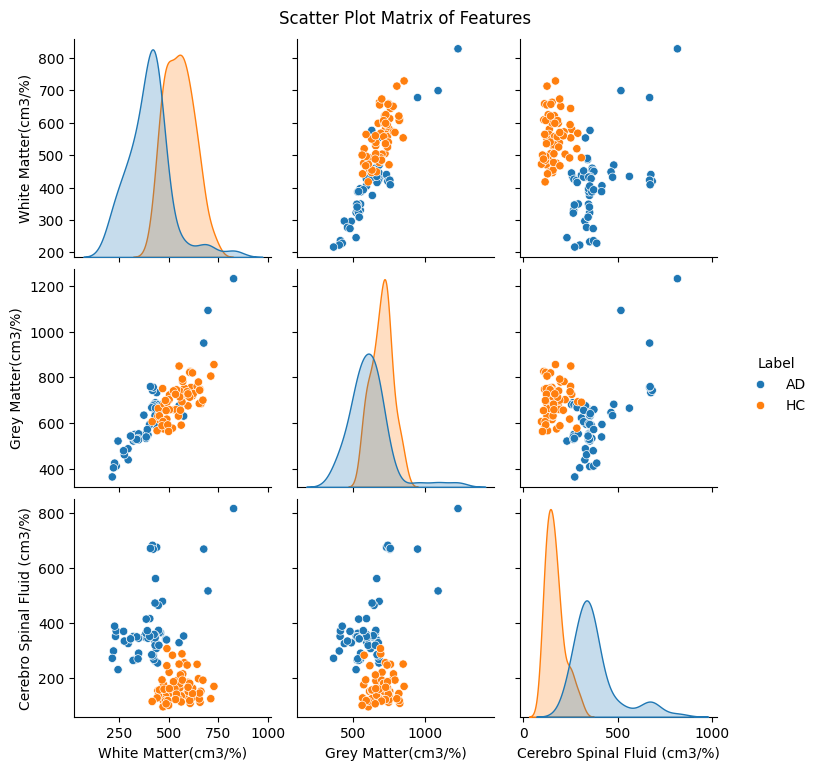

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df['Encoded_Label'] = label_encoder.transform(df['Label'])

sns.pairplot(df, hue='Label', vars=['White Matter(cm3/%)', 'Grey Matter(cm3/%)', 'Cerebro Spinal Fluid (cm3/%)'])
plt.suptitle("Scatter Plot Matrix of Features", y=1.02)
plt.show()

In [ ]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [ ]:
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'eta': 0.1,
    'max_depth': 6,
    'lambda': 1.0,
    'alpha': 0.0
}

num_round = 33

bst = xgb.train(params, dtrain, num_round)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

preds = bst.predict(dtest)

predicted_labels = (preds > 0.5).astype(int)

accuracy = accuracy_score(y_test, predicted_labels)
conf_matrix = confusion_matrix(y_test, predicted_labels)

print(f'Accuracy: {accuracy * 100:.2f}%')
print('Confusion Matrix:')
print(conf_matrix)

print('Class Labels:')
print(label_encoder.classes_)


Accuracy: 96.00%
Confusion Matrix:
[[14  0]
 [ 1 10]]
Class Labels:
['AD' 'HC']
